In [1]:
%load_ext autoreload
%autoreload 2
from scipy.stats import shapiro, ttest_rel
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from hmpai.visualization import plot_performance

#### Normality test

In [2]:
accs = [
    0.9193548387096774,
    0.9121540312876053,
    0.9324644549763034,
    0.836627140974967,
    0.9248768472906403,
    0.8748466257668711,
    0.9042690815006468,
    0.9038238702201622,
    0.9471830985915493,
    0.879245283018868,
    0.9549436795994993,
    0.9286592865928659,
    0.8991793669402111,
    0.8837535014005602,
    0.9428223844282239,
    0.9404761904761905,
    0.9235436893203883,
    0.9288256227758007,
    0.9601449275362319,
    0.8938271604938272,
    0.933420365535248,
    0.925700365408039,
    0.9255813953488372,
    0.8993464052287582,
    0.889294403892944,
]

f1s = [
    0.9189590478638655,
    0.9025428860739405,
    0.9297394289290478,
    0.836697914316906,
    0.9241266291884175,
    0.8784285148394029,
    0.9057057119524584,
    0.8921159676082195,
    0.9426972513106886,
    0.8758293413566214,
    0.9549060528176925,
    0.9309728717346563,
    0.9012248386433083,
    0.8848582287889718,
    0.9392833456687871,
    0.9390455145945186,
    0.9198482926913684,
    0.9265422288805676,
    0.9598112263179928,
    0.8968477639025977,
    0.9320553452096181,
    0.9251131491025688,
    0.9240732870736009,
    0.8950677656979513,
    0.8878237386847555,
]

In [3]:
print(shapiro(accs))
print(shapiro(f1s))

ShapiroResult(statistic=0.958040177822113, pvalue=0.3768245577812195)
ShapiroResult(statistic=0.9596362709999084, pvalue=0.40727755427360535)


#### Normalization

In [2]:
norm_accs = []
norm_f1s = []

# norm_dummy
norm_accs.append(
    [
        0.9193548387096774,
        0.9121540312876053,
        0.9324644549763034,
        0.836627140974967,
        0.9248768472906403,
        0.8748466257668711,
        0.9042690815006468,
        0.9038238702201622,
        0.9471830985915493,
        0.879245283018868,
        0.9549436795994993,
        0.9286592865928659,
        0.8991793669402111,
        0.8837535014005602,
        0.9428223844282239,
        0.9404761904761905,
        0.9235436893203883,
        0.9288256227758007,
        0.9601449275362319,
        0.8938271604938272,
        0.933420365535248,
        0.925700365408039,
        0.9255813953488372,
        0.8993464052287582,
        0.889294403892944,
    ]
)
norm_f1s.append(
    [
        0.9189590478638655,
        0.9025428860739405,
        0.9297394289290478,
        0.836697914316906,
        0.9241266291884175,
        0.8784285148394029,
        0.9057057119524584,
        0.8921159676082195,
        0.9426972513106886,
        0.8758293413566214,
        0.9549060528176925,
        0.9309728717346563,
        0.9012248386433083,
        0.8848582287889718,
        0.9392833456687871,
        0.9390455145945186,
        0.9198482926913684,
        0.9265422288805676,
        0.9598112263179928,
        0.8968477639025977,
        0.9320553452096181,
        0.9251131491025688,
        0.9240732870736009,
        0.8950677656979513,
        0.8878237386847555,
    ]
)

# norm_0_to_1
norm_accs.append(
    [
        0.9366359447004609,
        0.9253910950661853,
        0.9016587677725119,
        0.8801054018445322,
        0.9421182266009852,
        0.905521472392638,
        0.890038809831824,
        0.9107763615295481,
        0.9730046948356808,
        0.8716981132075472,
        0.9499374217772215,
        0.923739237392374,
        0.9062133645955451,
        0.9159663865546218,
        0.9549878345498783,
        0.9619047619047619,
        0.9429611650485437,
        0.9323843416370107,
        0.9698067632850241,
        0.9382716049382716,
        0.9569190600522193,
        0.9269183922046285,
        0.9255813953488372,
        0.9281045751633987,
        0.9355231143552312,
    ]
)
norm_f1s.append(
    [
        0.9388138577179113,
        0.9215762706980462,
        0.8981059231558867,
        0.884737006464861,
        0.944838292409494,
        0.9105641839383976,
        0.8901215000207987,
        0.9044797537452703,
        0.9719041756480473,
        0.8677145290728262,
        0.950135653534734,
        0.9281297733507425,
        0.9100076302028193,
        0.9172604968101006,
        0.9556017208506077,
        0.9607118451666221,
        0.9435964349717182,
        0.9311366687539809,
        0.9695541013663018,
        0.9415732820059036,
        0.9543689821416572,
        0.9260994663591344,
        0.9202227583391351,
        0.9273401018395818,
        0.9355618456120685,
    ]
)

# norm_min1_to_1
norm_accs.append(
    [
        0.9412442396313364,
        0.9265944645006017,
        0.9324644549763034,
        0.9143610013175231,
        0.9544334975369458,
        0.9079754601226994,
        0.9379042690815006,
        0.8829663962920047,
        0.9577464788732394,
        0.8981132075471698,
        0.9436795994993742,
        0.939729397293973,
        0.9214536928487691,
        0.9327731092436975,
        0.9586374695863747,
        0.9630952380952381,
        0.941747572815534,
        0.9525504151838672,
        0.9698067632850241,
        0.928395061728395,
        0.9530026109660574,
        0.9305724725943971,
        0.9302325581395349,
        0.9267973856209151,
        0.9221411192214112,
    ]
)

norm_f1s.append(
    [
        0.9425406186796635,
        0.92194606631211,
        0.9285754714114418,
        0.9144322434790408,
        0.9572985216162164,
        0.9125161404276809,
        0.9368758667869853,
        0.869179425603918,
        0.9566889219191961,
        0.8929239725659164,
        0.9454824956254007,
        0.9421590254289267,
        0.9232611773066305,
        0.934477043678535,
        0.9584586070827081,
        0.961298850954128,
        0.9422072969584032,
        0.952235274063853,
        0.9711760527952288,
        0.9300092280821304,
        0.9516158823861705,
        0.9311863176891493,
        0.9283996915637024,
        0.9229095736298719,
        0.9206619349023638,
    ]
)

# norm_zscore
norm_accs.append(
    [
        0.9262672811059908,
        0.9229843561973526,
        0.9478672985781991,
        0.8959156785243741,
        0.9470443349753694,
        0.905521472392638,
        0.9301423027166882,
        0.9073001158748552,
        0.9671361502347418,
        0.909433962264151,
        0.9586983729662077,
        0.939729397293973,
        0.9155920281359906,
        0.9103641456582633,
        0.9574209245742092,
        0.955952380952381,
        0.9453883495145631,
        0.9513641755634639,
        0.9818840579710145,
        0.9308641975308642,
        0.9477806788511749,
        0.9390986601705238,
        0.9255813953488372,
        0.9071895424836601,
        0.9184914841849149,
    ]
)
norm_f1s.append(
    [
        0.9262672811059908,
        0.9229843561973526,
        0.9478672985781991,
        0.8959156785243741,
        0.9470443349753694,
        0.905521472392638,
        0.9301423027166882,
        0.9073001158748552,
        0.9671361502347418,
        0.909433962264151,
        0.9586983729662077,
        0.939729397293973,
        0.9155920281359906,
        0.9103641456582633,
        0.9574209245742092,
        0.955952380952381,
        0.9453883495145631,
        0.9513641755634639,
        0.9818840579710145,
        0.9308641975308642,
        0.9477806788511749,
        0.9390986601705238,
        0.9255813953488372,
        0.9071895424836601,
        0.9184914841849149,
    ]
)

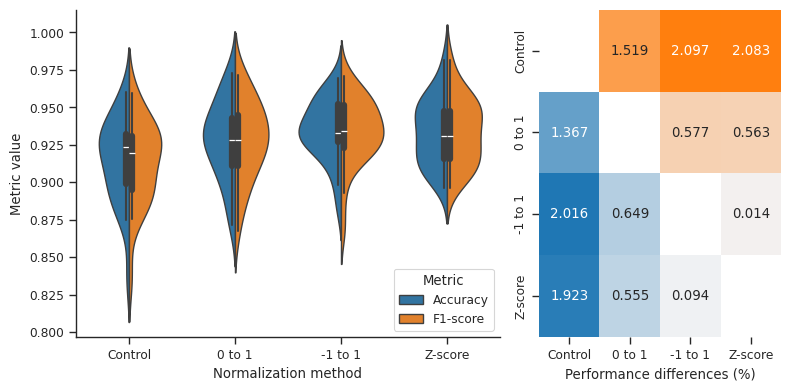

In [35]:
df = plot_performance(
    norm_accs,
    norm_f1s,
    ["Control", "0 to 1", "-1 to 1", "Z-score"],
    "Normalization method",
)

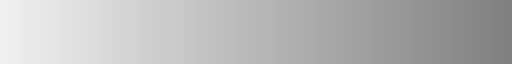

In [183]:
sns.light_palette(color=(0.5, 0.5, 0.5), as_cmap=True)

In [94]:
df.where(df["category"] == "Control").value.mean()
df.where(df["category"] == "0 to 1").value.mean()
means = df.groupby("category", sort=False).value.mean().to_numpy()

In [113]:
means = df.groupby(["category", "metric"]).mean().reset_index()

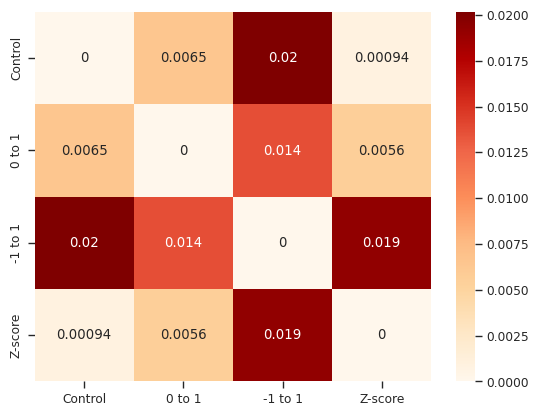

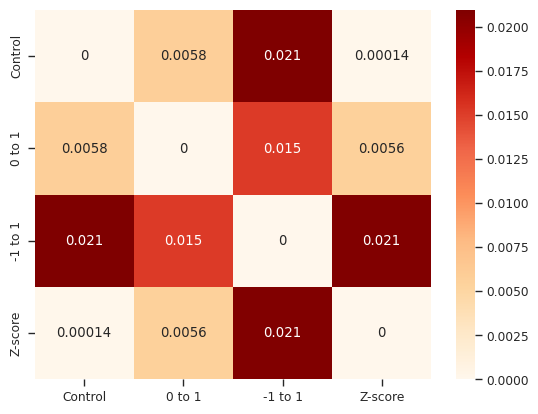

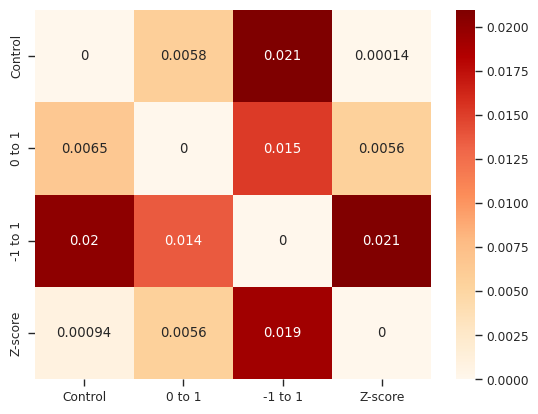

In [120]:
acc_means = means[means["metric"] == "Accuracy"].value.to_numpy()
acc_diffs = abs(acc_means[:, np.newaxis] - acc_means)
f1_means = means[means["metric"] == "F1-score"].value.to_numpy()
f1_diffs = abs(f1_means[:, np.newaxis] - f1_means)

mask = np.tril(np.ones_like(acc_diffs), k = 0)
sns.heatmap(acc_diffs, annot=True, xticklabels=["Control", "0 to 1", "-1 to 1", "Z-score"], yticklabels=["Control", "0 to 1", "-1 to 1", "Z-score"], cmap="OrRd")
plt.show()
sns.heatmap(f1_diffs, annot=True, xticklabels=["Control", "0 to 1", "-1 to 1", "Z-score"], yticklabels=["Control", "0 to 1", "-1 to 1", "Z-score"], cmap="OrRd")
acc_diffs[mask == 0] = f1_diffs[mask == 0]
plt.show()
sns.heatmap(acc_diffs, annot=True, xticklabels=["Control", "0 to 1", "-1 to 1", "Z-score"], yticklabels=["Control", "0 to 1", "-1 to 1", "Z-score"], cmap="OrRd")
plt.show()

In [108]:
means

,category,metric,value
0,-1 to 1,Accuracy,0.934737
1,-1 to 1,F1-score,0.933941
2,0 to 1,Accuracy,0.928247
3,0 to 1,F1-score,0.928166
4,Control,Accuracy,0.914575
5,Control,F1-score,0.912973
6,Z-score,Accuracy,0.933801
7,Z-score,F1-score,0.933801


In [99]:
diffs = means[:, np.newaxis] - means
mask = np.tril(np.ones_like(diffs), k=0)
diffs[mask == 0] = np.nan

In [101]:
means

array([0.91377361, 0.92820649, 0.93433867, 0.93380051])

<Axes: >

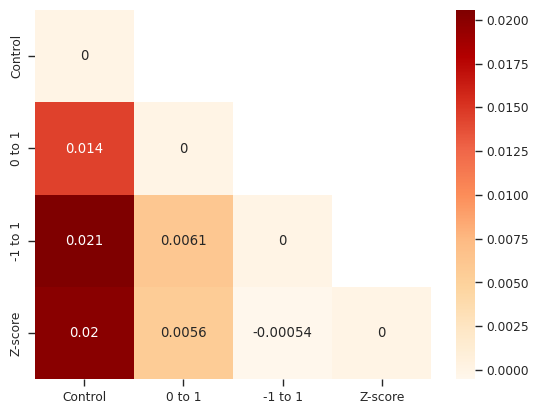

In [100]:
sns.heatmap(diffs, annot=True, xticklabels=["Control", "0 to 1", "-1 to 1", "Z-score"], yticklabels=["Control", "0 to 1", "-1 to 1", "Z-score"], cmap="OrRd")

#### Sampling frequency

In [15]:
sf_accs = []
sf_f1s = []
sf_categories = ["cnn-100hz", "cnn-500hz", "gru-100hz", "gru-500hz"]

# cnn 100
sf_accs.append(
    [
        0.8778173190984578,
        0.8505747126436781,
        0.8903614457831325,
        0.8361858190709046,
        0.901863354037267,
        0.8866103739445115,
        0.8556566970091027,
        0.8702830188679245,
        0.9361948955916474,
        0.8529769137302552,
        0.9105793450881612,
        0.8856088560885609,
        0.8545034642032333,
        0.8515850144092219,
        0.9140811455847255,
        0.9425901201602136,
        0.8436317780580076,
        0.871007371007371,
        0.9305177111716622,
        0.8982412060301508,
        0.9089790897908979,
        0.8913043478260869,
        0.8978562421185372,
        0.8143236074270557,
        0.8844282238442822,
    ]
)

sf_f1s.append(
    [
        0.8835294042582295,
        0.8434259576764486,
        0.8865009361666598,
        0.8396814694829328,
        0.9076672360976128,
        0.8938892497521496,
        0.8580407259180951,
        0.8613641027901272,
        0.9329667870669637,
        0.8518887179778225,
        0.9145815607244477,
        0.8870741851346942,
        0.8616304079348331,
        0.8552383825812481,
        0.9137691046509782,
        0.9430870537887216,
        0.8442752153426527,
        0.8708750075153233,
        0.9306251491431011,
        0.9000594562269637,
        0.907752201485518,
        0.891211745564416,
        0.8988642441050463,
        0.8240510991480738,
        0.885644096082576,
    ]
)
# cnn 500
sf_accs.append(
    [
        0.9216589861751152,
        0.8808664259927798,
        0.9075829383886256,
        0.8801054018445322,
        0.9236453201970444,
        0.8846625766871166,
        0.9055627425614489,
        0.8899188876013905,
        0.9553990610328639,
        0.8981132075471698,
        0.9474342928660826,
        0.9015990159901599,
        0.9073856975381008,
        0.9047619047619048,
        0.948905109489051,
        0.9238095238095239,
        0.8944174757281553,
        0.9074733096085409,
        0.9444444444444444,
        0.9098765432098765,
        0.9543080939947781,
        0.8989037758830695,
        0.9,
        0.8888888888888888,
        0.8990267639902676,
    ]
)
sf_f1s.append(
    [
        0.9225178901171512,
        0.8734550143551567,
        0.9004143684634609,
        0.8784079821724742,
        0.9263169057093907,
        0.8892612926678604,
        0.9028149468922129,
        0.8792682570679474,
        0.95133506997518,
        0.8967016103527513,
        0.9458426853383972,
        0.9016775636198426,
        0.9081153743827037,
        0.9015676970144014,
        0.947394630975861,
        0.9195878576044784,
        0.8912216176895444,
        0.9056589241542401,
        0.9414409042346297,
        0.9087975901560025,
        0.9523184408210428,
        0.9000719846635146,
        0.8971648392256316,
        0.8867887972619666,
        0.8982777022221147,
    ]
)

# gru 100
sf_accs.append(
    [
        0.8849347568208779,
        0.8569604086845466,
        0.9108433734939759,
        0.8251833740831296,
        0.901863354037267,
        0.8757539203860072,
        0.8439531859557867,
        0.8608490566037735,
        0.9245939675174014,
        0.8869987849331713,
        0.9181360201511335,
        0.9298892988929889,
        0.8498845265588915,
        0.8587896253602305,
        0.9176610978520287,
        0.9332443257676902,
        0.8915510718789408,
        0.9017199017199017,
        0.9359673024523161,
        0.9271356783919598,
        0.9175891758917589,
        0.8961352657004831,
        0.8953341740226987,
        0.8607427055702918,
        0.8941605839416058,
    ]
)

sf_f1s.append(
    [
        0.8924990050020559,
        0.8505354966222937,
        0.9100565835677958,
        0.8290995534059272,
        0.9048583815193949,
        0.8828986471885989,
        0.8451520388956398,
        0.8515605182305119,
        0.922556843553753,
        0.8879908119817623,
        0.9223143860128706,
        0.9326764702636918,
        0.8586057304207205,
        0.8632530011831305,
        0.9164850539857771,
        0.932663282270471,
        0.8951629549138154,
        0.9077748086232027,
        0.9363798505043557,
        0.9294770713837558,
        0.9197052524054221,
        0.8986464690361633,
        0.896542977569599,
        0.8647955627311337,
        0.8938593060604447,
    ]
)

# gru 500
sf_accs.append(
    [
        0.9412442396313364,
        0.9265944645006017,
        0.9324644549763034,
        0.9143610013175231,
        0.9544334975369458,
        0.9079754601226994,
        0.9379042690815006,
        0.8829663962920047,
        0.9577464788732394,
        0.8981132075471698,
        0.9436795994993742,
        0.939729397293973,
        0.9214536928487691,
        0.9327731092436975,
        0.9586374695863747,
        0.9630952380952381,
        0.941747572815534,
        0.9525504151838672,
        0.9698067632850241,
        0.928395061728395,
        0.9530026109660574,
        0.9305724725943971,
        0.9302325581395349,
        0.9267973856209151,
        0.9221411192214112,
    ]
)
sf_f1s.append(
    [
        0.9425406186796635,
        0.92194606631211,
        0.9285754714114418,
        0.9144322434790408,
        0.9572985216162164,
        0.9125161404276809,
        0.9368758667869853,
        0.869179425603918,
        0.9566889219191961,
        0.8929239725659164,
        0.9454824956254007,
        0.9421590254289267,
        0.9232611773066305,
        0.934477043678535,
        0.9584586070827081,
        0.961298850954128,
        0.9422072969584032,
        0.952235274063853,
        0.9711760527952288,
        0.9300092280821304,
        0.9516158823861705,
        0.9311863176891493,
        0.9283996915637024,
        0.9229095736298719,
        0.9206619349023638,
    ]
)

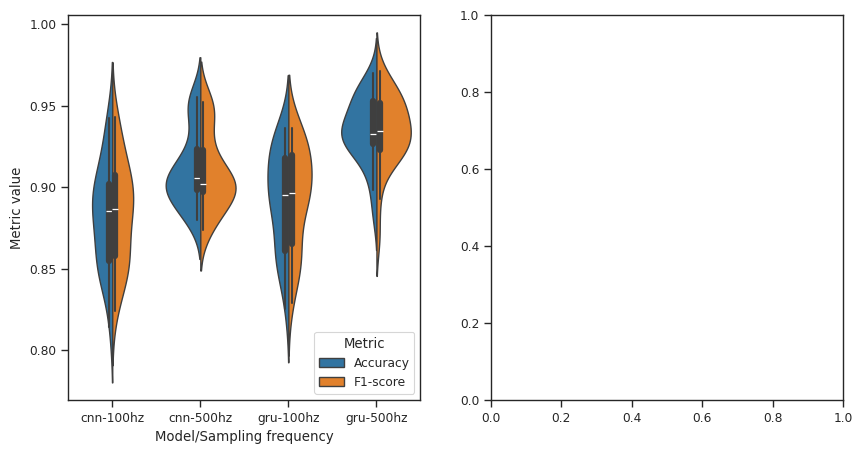

In [16]:
plot_performance(
    sf_accs, sf_f1s, sf_categories, "Model/Sampling frequency"
)